# Importing libraries

In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import math
import folium
from folium.plugins import HeatMap
import config
import logging
import requests
import datetime
import glob
import geopandas
from pyproj import Proj, transform
from shapely.geometry import Point, Polygon

# Read data

In [24]:
def clean_plr(df):
#After reading csv file, cleaning PLR_ID into correct str format
    df['PLR_ID'] = df['PLR_ID'].apply(int)
    df['PLR_ID'] = df['PLR_ID'].apply(lambda x: "0" + str(x) if len(str(x))== 7 else x)
    return df

LOR

In [43]:
path_to_daza_plr = "../raw_data/LOR_shpfiles/lor_plr.shp"
gdf_plr = geopandas.read_file(path_to_daza_plr)
gdf_plr = clean_plr(gdf_plr)
gdf_plr.info()

<class 'geopandas.geodataframe.GeoDataFrame'>
RangeIndex: 542 entries, 0 to 541
Data columns (total 3 columns):
 #   Column    Non-Null Count  Dtype   
---  ------    --------------  -----   
 0   PLR_ID    542 non-null    object  
 1   PLR_NAME  542 non-null    object  
 2   geometry  542 non-null    geometry
dtypes: geometry(1), object(2)
memory usage: 12.8+ KB


In [30]:
def read_csv(path):
    #Read csv and clean PLR_ID
    df = pd.read_csv(path)
    df = clean_plr(df)
    
    #Drop geometry column and added from shapefile
    df.drop(columns=['geometry', 'PLR_NAME'], inplace=True)
    
    #Merge it to LOR DataFrame
    _df = gdf_plr.merge(df, how='left', on="PLR_ID")
    df = _df
    df.fillna(0, inplace=True)
    return df

In [36]:
bike_counts = read_csv('../data/bike_counts_streamlit.csv')
accident_counts2018 = read_csv('../data/accident_counts2018_streamlit.csv')
accident_counts2019 = read_csv('../data/accident_counts2019_streamlit.csv')
accident_counts2020 = read_csv('../data/accident_counts2020_streamlit.csv')

In [42]:
accident_counts2020.info()

<class 'geopandas.geodataframe.GeoDataFrame'>
Int64Index: 542 entries, 0 to 541
Data columns (total 4 columns):
 #   Column          Non-Null Count  Dtype   
---  ------          --------------  -----   
 0   PLR_ID          542 non-null    object  
 1   PLR_NAME        542 non-null    object  
 2   geometry        542 non-null    geometry
 3   accident_count  542 non-null    float64 
dtypes: float64(1), geometry(1), object(2)
memory usage: 21.2+ KB


# Mapping

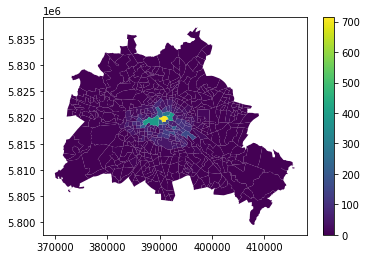

In [28]:
#Mapping based on Area of PLR using GeoplotAccessor
bike_counts.plot("bike_count", legend=True);

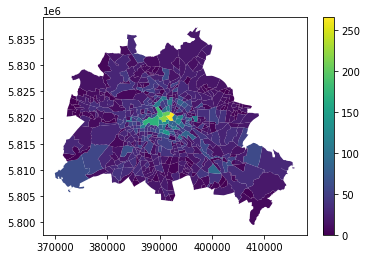

In [29]:
#Mapping based on Area of PLR using GeoplotAccessor
accident_counts.plot("accident_count", legend=True);

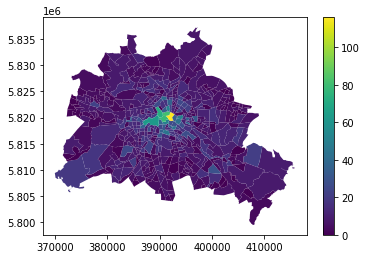

In [37]:
#Mapping based on Area of PLR using GeoplotAccessor
accident_counts2018.plot("accident_count", legend=True);

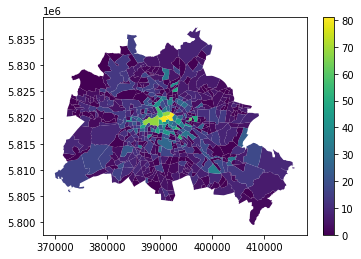

In [38]:
#Mapping based on Area of PLR using GeoplotAccessor
accident_counts2019.plot("accident_count", legend=True);

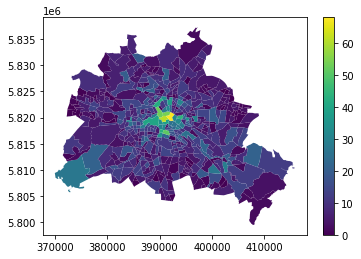

In [39]:
#Mapping based on Area of PLR using GeoplotAccessor
accident_counts2020.plot("accident_count", legend=True);